Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'
Lỗi khi trích xuất dữ liệu: 'Số tầng'


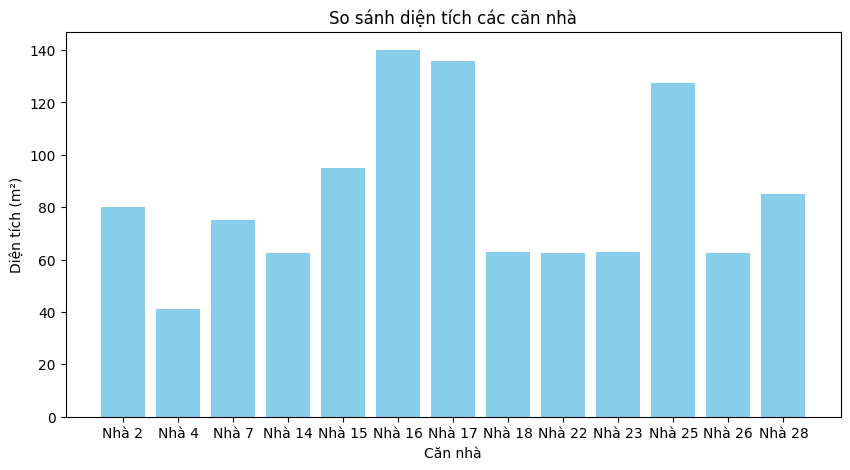

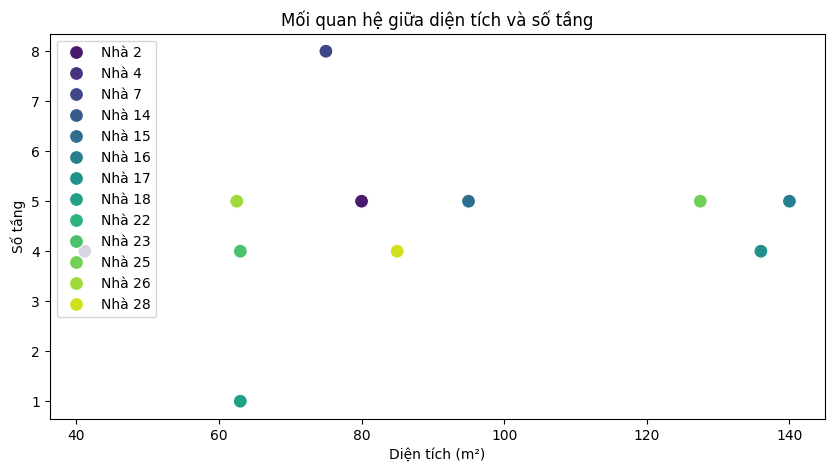

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm đọc data từ file JSON
def read_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# Hàm visualize dữ liệu bất động sản (diện tích và số tầng)
def visualize_estate_data(data):
    # Trích xuất diện tích và số tầng từ data
    dien_tich = []
    so_tang = []
    labels = []
    
    for i, estate in enumerate(data):
        # Xử lý chuỗi diện tích và số tầng để lấy giá trị số
        try:
            dt = float(estate['Diện tích'].replace('m²', '').replace(',', '.').strip())
            st = int(estate['Số tầng'].split()[0])  # Chỉ lấy số đầu tiên
            dien_tich.append(dt)
            so_tang.append(st)
            labels.append(f"Nhà {i+1}")
        except Exception as e:
            print(f"Lỗi khi trích xuất dữ liệu: {e}")

    # Vẽ biểu đồ cột so sánh diện tích các căn nhà
    plt.figure(figsize=(10, 5))
    plt.bar(labels, dien_tich, color='skyblue')
    plt.title('So sánh diện tích các căn nhà')
    plt.xlabel('Căn nhà')
    plt.ylabel('Diện tích (m²)')
    plt.show()

    # Vẽ biểu đồ Seaborn so sánh số tầng và diện tích
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=dien_tich, y=so_tang, hue=labels, s=100, palette="viridis")
    plt.title('Mối quan hệ giữa diện tích và số tầng')
    plt.xlabel('Diện tích (m²)')
    plt.ylabel('Số tầng')
    plt.show()

# Đọc dữ liệu từ file general_data.json
data = read_data('../general_data.json')

# Thực hiện visualize dữ liệu bất động sản
visualize_estate_data(data)


Kiểm tra tần suất xuất hiện của các thuộc tính  

In [3]:
import json
from collections import defaultdict

# Hàm đọc dữ liệu từ file JSON
def read_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# Hàm thống kê tần suất xuất hiện của các thuộc tính
def analyze_attributes(data):
    attribute_count = defaultdict(int)  # Tạo dict đếm tần suất xuất hiện của các thuộc tính

    # Duyệt qua từng object trong dữ liệu
    for estate in data:
        # Duyệt qua các key (attribute) trong mỗi object
        for key in estate.keys():
            attribute_count[key] += 1

    total_objects = len(data)
    
    # In ra kết quả thống kê
    print(f"Tổng số object được phân tích: {total_objects}")
    print("\nThống kê các thuộc tính:")
    
    for attribute, count in attribute_count.items():
        missing_count = total_objects - count  # Số object thiếu attribute này
        print(f"- {attribute}: xuất hiện {count}/{total_objects} (thiếu {missing_count})")

# Đọc dữ liệu từ file JSON
data = read_data('../general_data.json')

# Thống kê các thuộc tính và in ra thông tin cần thiết
analyze_attributes(data)


Tổng số object được phân tích: 29

Thống kê các thuộc tính:
- Tên: xuất hiện 29/29 (thiếu 0)
- Url: xuất hiện 29/29 (thiếu 0)
- Vị trí: xuất hiện 29/29 (thiếu 0)
- Diện tích: xuất hiện 29/29 (thiếu 0)
- Mức giá: xuất hiện 29/29 (thiếu 0)
- Hướng nhà: xuất hiện 14/29 (thiếu 15)
- Hướng ban công: xuất hiện 13/29 (thiếu 16)
- Số phòng ngủ: xuất hiện 29/29 (thiếu 0)
- Số toilet: xuất hiện 24/29 (thiếu 5)
- Nội thất: xuất hiện 20/29 (thiếu 9)
- Pháp lý: xuất hiện 20/29 (thiếu 9)


Number : 
290
         Vị trí  Mức giá (Tỷ VND)
0        Tây Hồ              80.0
1    Thanh Xuân              78.0
2   Nam Từ Liêm              73.0
3  Hai Bà Trưng               6.0
4       Đống Đa               9.5


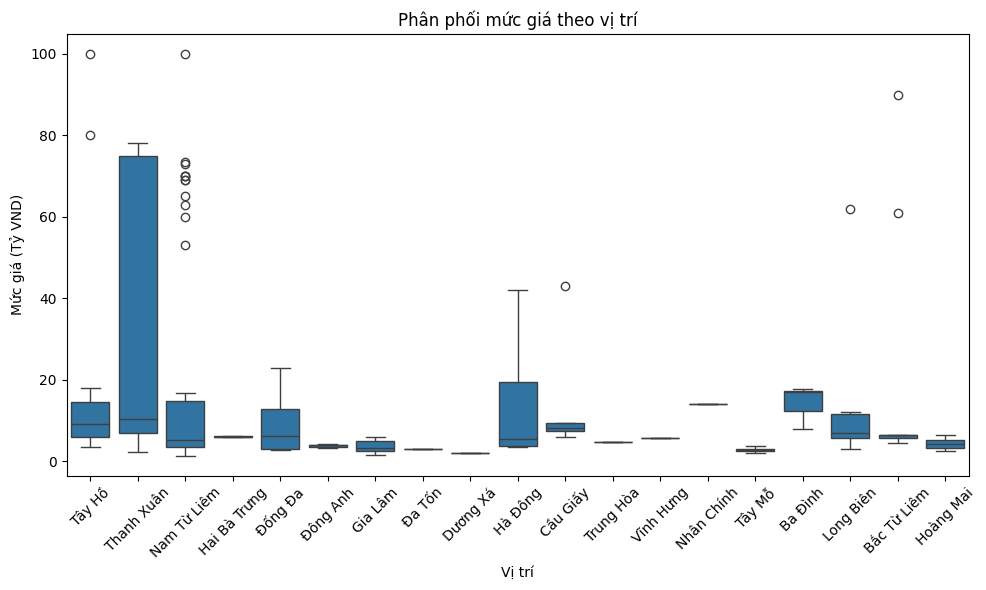

In [10]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Hàm đọc dữ liệu từ file JSON
def read_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# Hàm chuyển đổi chuỗi mức giá thành số (loại bỏ "Thỏa thuận" và các giá trị không hợp lệ)
def parse_price(price_str):
    if "Thỏa thuận" in price_str:
        return None
    # Sử dụng regex để tìm giá trị số và chuyển sang float
    price = re.findall(r'\d+(?:,\d+)?', price_str)
    if price:
        return float(price[0].replace(',', '.'))
    return None

# Chuyển dữ liệu sang DataFrame của Pandas
def prepare_dataframe(data):
    records = []
    for estate in data:
        price = parse_price(estate.get('Mức giá', 'Thỏa thuận'))
        location = estate.get('Vị trí', 'Không xác định')
        if price is not None:
            records.append({'Vị trí': location, 'Mức giá (Tỷ VND)': price})
    return pd.DataFrame(records)

# Đọc dữ liệu từ file
data = read_data('../general_data.json')

# log number of data
print('Number : ')
print(len(data))

# Chuẩn bị DataFrame
df = prepare_dataframe(data)

# Kiểm tra dữ liệu đã xử lý
print(df.head())

# Vẽ Boxplot để thể hiện mối quan hệ giữa vị trí và mức giá
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vị trí', y='Mức giá (Tỷ VND)', data=df)
plt.title('Phân phối mức giá theo vị trí')
plt.xlabel('Vị trí')
plt.ylabel('Mức giá (Tỷ VND)')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu tên vị trí dài
plt.tight_layout()
plt.show()
